# Some optimization ideas

ideas mostly own, but have used some nice plotting snippets from stackexchange 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Linear Regression

first let us generate some simple toy data using the standard model.

In [2]:
m, n = 100, 2
theta_true = np.random.rand(n, 1)
X = np.random.randn(m, n)

noise_var = 1e-6
noise = np.sqrt(noise_var) * np.random.randn(m, 1)

y = np.dot(X, theta_true) + noise


In [3]:
def cost_function(theta, x, y):   
    """
    Inputs: 
        theta: this is the parameter vector of size (n x 1)
        x: this is the input training sample of size (m x n)
        y: this is the output training sample of size (m x 1)
        
    Outputs: 
        cost_function(theta, x, y): the "loss" incurred under current value of parameter
    """
    yhat = np.dot(X, theta)
    return 1/m * np.linalg.norm( np.squeeze(y) - np.squeeze(yhat), 2) ** 2

def cost_gradient(theta, x, y):   
    """
    Inputs: 
        theta: this is the parameter vector of size (n x 1)
        x: this is the input training sample of size (1 x n)
        y: this is the output training sample of size (1 x 1)
        
    Outputs: 
        cost_gradient(theta, x, y): the gradient of cost evaluated at parameter theta
    """
    yhat = np.squeeze(x).dot(np.squeeze(theta))
    return 2 * (yhat  - y) * x.T

let us visualize how the "cost function" looks

[[0.64655557]
 [0.46421752]]


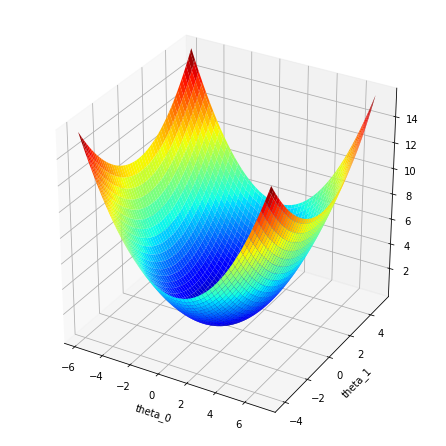

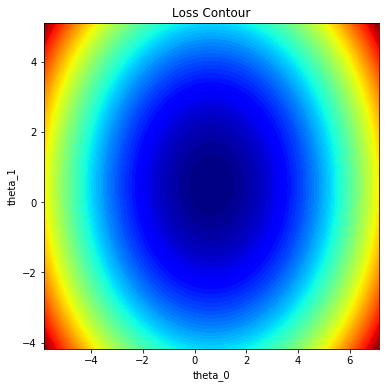

In [102]:
print(theta_true)
xx = np.linspace(-9 * theta_true[0], 11 * theta_true[0], 100)
yy = np.linspace(-9 * theta_true[1], 11 * theta_true[1], 100)

"""
xx = np.linspace(-1000, 1000, 100)
yy = np.linspace(-1000, 1000, 100)
"""
theta0, theta1 = np.meshgrid(xx, yy)
def contour_funct(theta0, theta1, x=np.array([0.5,0.5])):
    return( (x[0] * (theta_true[0] - theta0)) **2 + (x[1] * (theta_true[1] - theta1)) **2)

Z = contour_funct(theta0, theta1)


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.plot_surface(theta0, theta1, Z, cmap='jet')
plt.xlabel('theta_0')
plt.ylabel('theta_1')

plt.figure(figsize =(6,6))
plt.contourf(theta0, theta1, Z, 100, origin='image', cmap= 'jet')
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.title('Loss Contour')
plt.show()




let us implement gradient descent! 

In [68]:
def gradient_descent(X, y, theta_init, max_iter=1000, step_size = 1e-2):
    theta_list = [theta_init]
    m, n = X.shape
    for _ in range(max_iter):
        grad = 0
        for ii in range(m):
            grad += cost_gradient(theta_init, X[ii:ii+1, :], y[ii])
            
        theta_new  = theta_init - step_size * grad / m
        theta_init = theta_new
        #theta -= step_size * grad / m
        theta_list.append(theta_new) 
    return np.squeeze(np.array(theta_list))


def error_vals(X, y, theta_list):
    max_iter = theta_list.shape[0]
    err = []
    for ii in range(max_iter):
        err_tmp = cost_function(theta_list[ii], X, y)
        err.append(err_tmp)
    return err

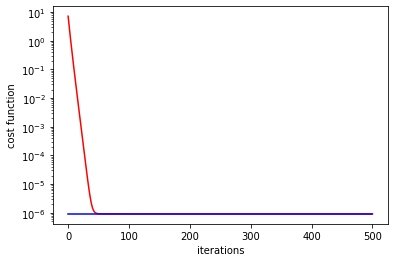

In [89]:
##initialize hyper-parameters
max_iter = 500
step_size = .1

theta_list = gradient_descent(X, y, np.random.randn(n,1), max_iter, step_size)
cost_decay = error_vals(X, y, theta_list)

plt.plot(cost_decay, 'r', range(max_iter), [cost_function(theta_true, X, y)] * max_iter, 'b')
plt.yscale("log")
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()

what about stochastic gradient descent? 

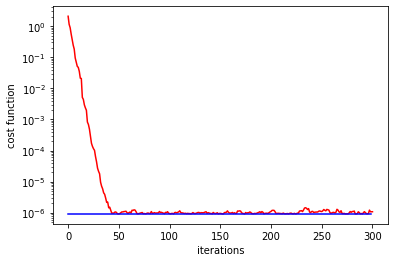

In [88]:
def stoch_gradient_descent(X, y, theta_init, batch_size=1, max_iter=1000, step_size = 1e-2):
    theta_list = [theta_init]
    m, n = X.shape
    for _ in range(max_iter):
        idx = np.random.randint(0, m, size=batch_size)
        grad=0
        for ii in idx:
            grad += cost_gradient(theta_init, X[ii:ii+1, :], y[ii])
            
        theta_new  = theta_init - step_size * grad/batch_size
        theta_init = theta_new
        #theta -= step_size * grad / m
        theta_list.append(theta_new) 
    return np.squeeze(np.array(theta_list))


##initialize hyper-parameters
max_iter1 = 300
step_size1 = .1
batch_size = 3
theta_list_sgd = stoch_gradient_descent(X, y, np.random.randn(n,1), batch_size, max_iter1, step_size1)
cost_decay_sgd = error_vals(X, y, theta_list_sgd)

plt.plot(cost_decay_sgd, 'r', range(max_iter1), [cost_function(theta_true, X, y)] * max_iter1, 'b')
plt.yscale("log")
plt.xlabel('iterations')
plt.ylabel('cost function')
plt.show()

### now what happens if we have a ``different'' optimization problem ?? 

### what about logistic regression? let's check it out! 

In [237]:
def generate_data_classification(m = 50, n=2, phi=0.5):
    """
    Inputs
        m : number of samples
        n : number of features (setting to 2 by default for visualization)
        phi: "fraction of samples that are from class 0"
        
    Outputs
        X : matrix of features
        y : class labels 
    """

    #generate the mean vectors and the covariance matrix
    mu_0 = 1 * np.ones((n,1))
    mu_1 = -1 * np.ones((n,1))
    sigma = 3 * np.eye(n)

    #first generate class labels
    bern_idx = np.random.rand(m, 1)
    y = 1 * (bern_idx >= phi)
    
    #now generate X
    X = np.zeros((m, n))
    for ii in range(m):
        if (y[ii] == 0):
            xtmp = sigma @ np.random.randn(n, 1) + mu_0
            
        else:
            xtmp = sigma @ np.random.randn(n,1) + mu_1
        
        X[ii:ii + 1, :] = xtmp.T
    return X, y

#let us actually generate the data
m = 50
n = 2
phi = 0.5 
X,  y = generate_data_classification(m, n, phi)
print(X.shape, y.shape)

(50, 2) (50, 1)


before we do anything, let us visualize the data and see if everything is in order 

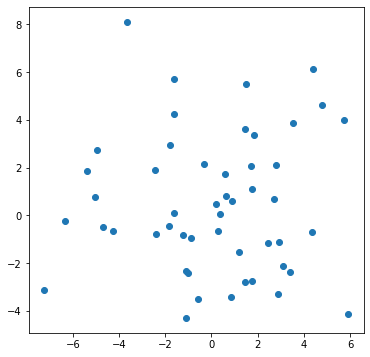

In [238]:
#let us ignore the labels for now
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:, 1])
plt.show()

this doesn't tell us much. let us use the class information as well

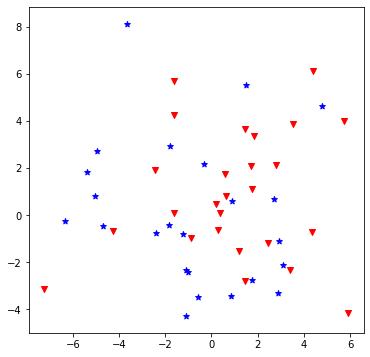

In [239]:
#list comprehension to separate the data! 
X_zero = np.array([np.array(X[ii,:]) for ii in range(m) if y[ii] == 0])
X_one = np.array([np.array(X[ii,:]) for ii in range(m) if y[ii] == 1])

plt.figure(figsize=(6,6))
plt.scatter(X_zero[:,0], X_zero[:, 1], color='red', marker='v')
plt.scatter(X_one[:,0], X_one[:, 1], color='blue', marker='*')
plt.show()

notice that depending on the means and variances, the data might be significantly overlapped!

anyway, now that we can *control* our data what exactly is logistic regression doing? in the above figure, any _line_ that separates the two classes, is essentially **perpendicular** to a **good theta**. Again, recall that we need to learn theta.  

## visualizing the cost function, again

In [240]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def neg_log_cost(theta, X, y):
    """
    X is feature matrix
    y is class label
    theta is "hyperplane"
    """
    
    cost_eval = 0
    m, n = X.shape
    for ii in range(m):
        xtmp = X[ii:ii+1, :]
        #print(theta.shape)
        htheta_xtmp = sigmoid(np.squeeze(xtmp).dot(np.squeeze(theta)))
        #print(htheta_xtmp.shape)
        cost_eval -= y[ii] * np.log(htheta_xtmp + np.finfo(float).eps) + (1 - y[ii]) * np.log(1 - htheta_xtmp + np.finfo(float).eps)
    #print(cost_eval)
    return 1/m * cost_eval 

xx = np.linspace(-100, 100, 100)
yy = np.linspace(-100, 100, 100)

theta0, theta1 = np.meshgrid(xx, yy)

def contour_funct_lr(theta0, theta1, X, y):
    Z = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            theta_tmp = np.array([theta0[[i], [j]], theta1[[i], [j]]])
            Z[[i], [j]] = neg_log_cost(theta_tmp, X, y)
    return Z

Z = contour_funct_lr(theta0, theta1, X, y)

/home/praneeth/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Text(0.5, 0, 'theta_1')

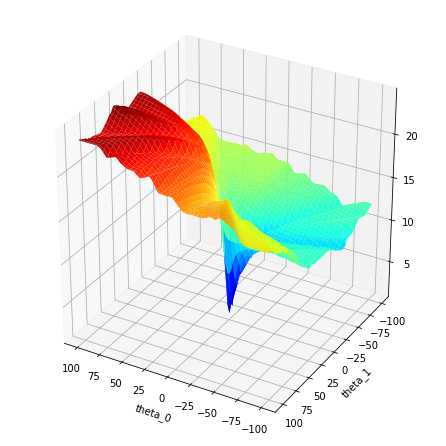

In [241]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
ax.plot_surface(theta0, theta1, Z, cmap='jet')
ax.view_init(azim=120, elev=30)
plt.xlabel('theta_0')
plt.ylabel('theta_1')